In [1]:
import tensorflow as tf
tf.random.set_seed(123)
import glob
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)
import seaborn as sns
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
paths = glob.glob('.\\data\\*')
dict_path_classes = {f"{idx}":path.split('\\')[-1] for idx, path in enumerate(paths)}
dict_path_classes

{'0': 'Mild_Demented',
 '1': 'Moderate_Demented',
 '2': 'Non_Demented',
 '3': 'Very_Mild_Demented'}

## EDA

In [5]:
X = []
y = []
for key, value in dict_path_classes.items():
    print(key, value)
    for path in glob.glob(f'.\\data\\{value}\\*.jpg'):
        img = plt.imread(path)
        X.append(img.reshape(128,128,1))
        y.append(key)

0 Mild_Demented
1 Moderate_Demented
2 Non_Demented
3 Very_Mild_Demented


In [6]:
X = np.array(X)
y = np.array(y)

In [8]:
def create_dataset_b():
    y_b = []
    for label in y:
        if label in ["0","1", "3"]:
            y_b.append(1)
        else:
            y_b.append(0)
    return np.array(y_b)

In [9]:
y_b = create_dataset_b()
y_b.shape

(6400,)

In [10]:
df1 = pd.DataFrame(data=y_b, columns=["labels"])
df1.value_counts()

labels
0         3200
1         3200
Name: count, dtype: int64

In [12]:
model = tf.keras.models.Sequential(name="Pretraining_CNN")
model.add(tf.keras.layers.Input(shape=(128,128,1), name="input_layer"))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation="relu", name="conv2D_1"))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu", name="conv2D_2"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name="max_pool_1"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation="relu", name="conv2D_3"))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation="relu", name="conv2D_4"))
model.add(tf.keras.layers.Flatten(name="flatten"))
model.add(tf.keras.layers.Dense(256, activation='relu', name="MLP_1"))
model.add(tf.keras.layers.Dropout(0.2, name="drop_out_1"))
model.add(tf.keras.layers.Dense(128, activation='relu', name="MLP_2"))
model.add(tf.keras.layers.Dropout(0.2, name="drop_out_2"))
model.add(tf.keras.layers.Dense(64, activation='relu', name="MLP_3"))
model.add(tf.keras.layers.Dropout(0.2, name="drop_out_3"))
model.add(tf.keras.layers.Dense(2, activation='softmax', name="output_classification"))

In [13]:
model.summary()

Model: "Pretraining_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2D_1 (Conv2D)           (None, 128, 128, 16)      160       
                                                                 
 conv2D_2 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 64, 64, 32)        0         
                                                                 
 conv2D_3 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2D_4 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 MLP_1 (Dense)               (None, 256)           

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y_b, random_state=123, test_size=0.1)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state=123, test_size=0.2)

In [18]:
BATCH_SIZE = 12

train_ds = tf.data.Dataset.from_tensor_slices(tensors=(X_train, y_train))
train_ds = train_ds.shuffle(buffer_size = len(y_train), seed=123).batch(batch_size=BATCH_SIZE)

valid_ds = tf.data.Dataset.from_tensor_slices(tensors=(X_val, y_val))
valid_ds = valid_ds.shuffle(buffer_size = len(y_val), seed=123).batch(batch_size=BATCH_SIZE)

test_ds = tf.data.Dataset.from_tensor_slices(tensors=(X_test, y_test))
test_ds = test_ds.shuffle(buffer_size = len(y_test), seed=123).batch(batch_size=BATCH_SIZE)

In [19]:
model.fit(train_ds,validation_data=valid_ds, epochs=70, verbose=-1)

Epoch 1/70
Epoch 2/70
Epoch 3/70
Epoch 4/70
Epoch 5/70
Epoch 6/70
Epoch 7/70
Epoch 8/70
Epoch 9/70
Epoch 10/70
Epoch 11/70
Epoch 12/70
Epoch 13/70
Epoch 14/70
Epoch 15/70
Epoch 16/70
Epoch 17/70
Epoch 18/70
Epoch 19/70
Epoch 20/70
Epoch 21/70
Epoch 22/70
Epoch 23/70
Epoch 24/70
Epoch 25/70
Epoch 26/70
Epoch 27/70
Epoch 28/70
Epoch 29/70
Epoch 30/70
Epoch 31/70
Epoch 32/70
Epoch 33/70
Epoch 34/70
Epoch 35/70
Epoch 36/70
Epoch 37/70
Epoch 38/70
Epoch 39/70
Epoch 40/70
Epoch 41/70
Epoch 42/70
Epoch 43/70
Epoch 44/70
Epoch 45/70
Epoch 46/70
Epoch 47/70
Epoch 48/70
Epoch 49/70
Epoch 50/70
Epoch 51/70
Epoch 52/70
Epoch 53/70
Epoch 54/70
Epoch 55/70
Epoch 56/70
Epoch 57/70
Epoch 58/70
Epoch 59/70
Epoch 60/70
Epoch 61/70
Epoch 62/70
Epoch 63/70
Epoch 64/70
Epoch 65/70
Epoch 66/70
Epoch 67/70
Epoch 68/70
Epoch 69/70
Epoch 70/70


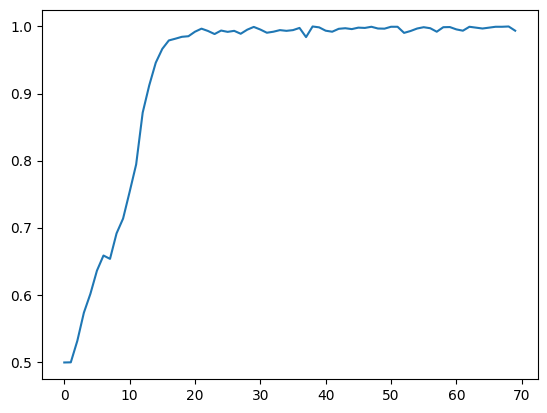

In [20]:
plt.plot(model.history.history['accuracy'])

In [21]:
intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('MLP_3').output)

In [22]:
features_train = intermediate_layer_model.predict(train_ds)
features_val = intermediate_layer_model.predict(valid_ds)
features_test = intermediate_layer_model.predict(test_ds)

54/54 [==============================] - 0s 6ms/step


In [23]:
features_train.shape

(4608, 64)

In [24]:
DB1=np.vstack([features_train,features_val,features_test])

In [25]:
from sklearn.decomposition import PCA

In [26]:
X_PCA=pd.DataFrame(np.array([i.reshape(128,128).flatten() for i in X]))

In [27]:
PCA(3,random_state=321).fit(X_PCA).explained_variance_ratio_

array([0.22163745, 0.10581736, 0.07877448])

In [28]:
results_pca={}
for i in range(80,100+1):
    results_pca[i] = PCA(i,random_state=321).fit(X_PCA).explained_variance_ratio_.sum()
    if results_pca[i]>=0.8:
        break

In [32]:
results_pca

{60: 0.6613646120610885,
 61: 0.6632140187290753,
 62: 0.6650091583982496,
 63: 0.666949522576672,
 64: 0.6686416687454136,
 65: 0.6704972025555749,
 66: 0.6722074236035573,
 67: 0.6739567776020482,
 68: 0.6756841509449952,
 69: 0.6773776081004657,
 70: 0.679003133149722,
 71: 0.6806656612085936,
 72: 0.6824003330568028,
 73: 0.6840722341976471,
 74: 0.6855455461464293,
 75: 0.6872123247910257,
 76: 0.6888102958554144,
 77: 0.6904702461781622,
 78: 0.6920294425171798,
 79: 0.6936323353284851,
 80: 0.6951946234256127,
 81: 0.6966106433488541,
 82: 0.6982433795580998,
 83: 0.6996693728544083,
 84: 0.7011145617414072,
 85: 0.702565719141585,
 86: 0.7040674282294553,
 87: 0.7055726418904,
 88: 0.7069466009445433,
 89: 0.7083772188911209,
 90: 0.7097428786989486,
 91: 0.7111972305189603,
 92: 0.7124900388238361,
 93: 0.7139190083104109,
 94: 0.7151740342184616,
 95: 0.7165887483879838,
 96: 0.71784624291462,
 97: 0.7191770802330819,
 98: 0.7205362884237915,
 99: 0.7217926597802643,
 100: 0.

In [33]:
DB2=PCA(i,random_state=321).fit_transform(X_PCA)

In [34]:
DB3=pd.DataFrame(np.hstack([DB1,DB2]))

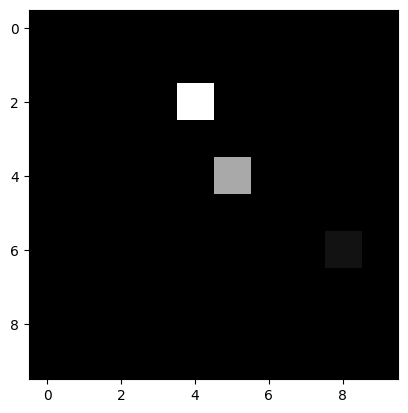

In [48]:
plt.imshow(features_train[-1][:100].reshape((10,10)), cmap="gray")

In [35]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [36]:
svm_model = SVC(random_state=967)
RF = RandomForestClassifier(random_state=967)

In [37]:
y_=np.hstack([y_train,y_val,y_test])
y_

array([1, 0, 1, ..., 0, 1, 1])

In [38]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(DB3,y, random_state=123, test_size=0.2)

In [39]:
RF.fit(X_train_,y_train_)

RandomForestClassifier(random_state=967)

In [46]:
svm_model.fit(X_train_,y_train_)

SVC(random_state=967)

In [47]:
y_pred = svm_model.predict(X_test_)

In [42]:
y_pred = RF.predict(X_test_)


In [43]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_pred=y_pred, y_true=y_test_)

0.90859375

In [49]:
model.evaluate(test_ds)

54/54 [==============================] - 1s 10ms/step - loss: 0.1225 - accuracy: 0.9766


[0.12247369438409805, 0.9765625]